In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [4]:
from pmdarima import auto_arima

In [5]:
df = pd.read_excel('prepdata.xlsx',index_col=0,parse_dates=True)
df.dropna(axis='columns',inplace=True)
df.head()

,CO1 Comdty,CO2 Comdty,CO3 Comdty,CO4 Comdty,PVMMDS12 Index,PVMMDS23 Index,PVMMD2M3 Index,PVMMD3M4 Index,PVMMDBSP Index,DKI1 Comdty,...,CFCDQORS Index,CFCDPORL Index,CFCDPORS Index,CFCDQPTS Index,CFCDQSWD Index,CFCDPMMD Index,OISTCRDE Index,GBPUSD Curncy,EURUSD Curncy,JPYUSD Curncy
2018-01-02,66.57,66.13,65.79,65.51,0.25,0.25,0.25,0.25,3.08,64.01,...,55237,36753,39940,70,388157,47687,2480,1.3590,1.2059,0.008906
2018-01-03,67.84,67.29,66.90,66.57,0.26,0.26,0.26,0.26,3.36,65.24,...,55237,36753,39940,70,388157,47687,2526,1.3516,1.2015,0.008888
2018-01-04,68.07,67.51,67.11,66.77,0.29,0.29,0.29,0.29,3.34,65.30,...,55237,36753,39940,70,388157,47687,2539,1.3551,1.2068,0.008869
2018-01-05,67.62,67.10,66.73,66.41,0.28,0.26,0.28,0.26,3.29,64.93,...,55237,36753,39940,70,388157,47687,2539,1.3571,1.2029,0.008844
2018-01-08,67.78,67.31,66.95,66.64,0.26,0.24,0.26,0.24,3.24,65.09,...,55237,36753,39940,70,388157,47687,2538,1.3568,1.1967,0.008842


In [6]:
df1 = df[['PVMPGDM1 Index','PVMPGDM2 Index','PVMPGDM3 Index','PVMPGDM4 Index']]
df1.index.freq = 'B'

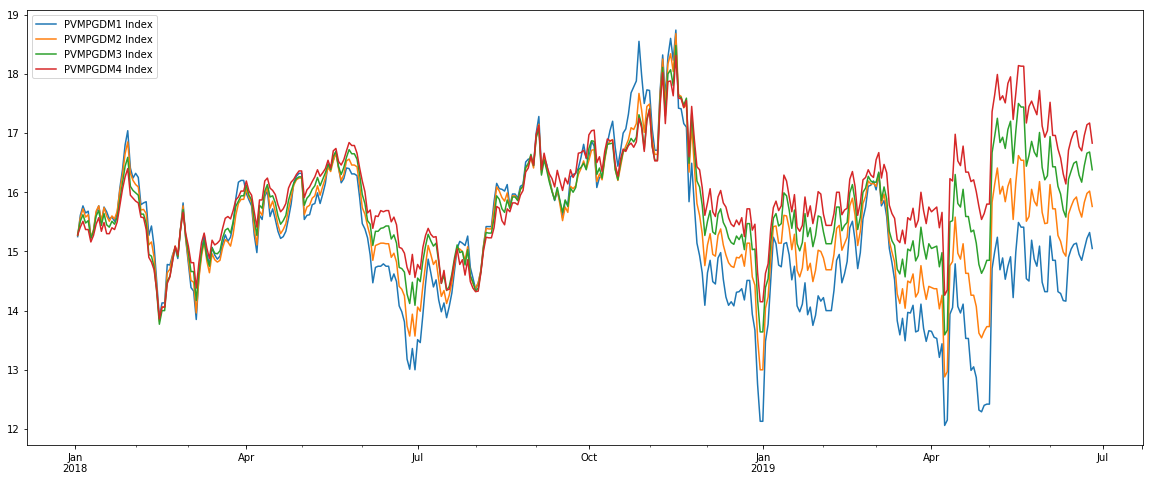

In [7]:
df1.plot(figsize=(20,8),legend=True);

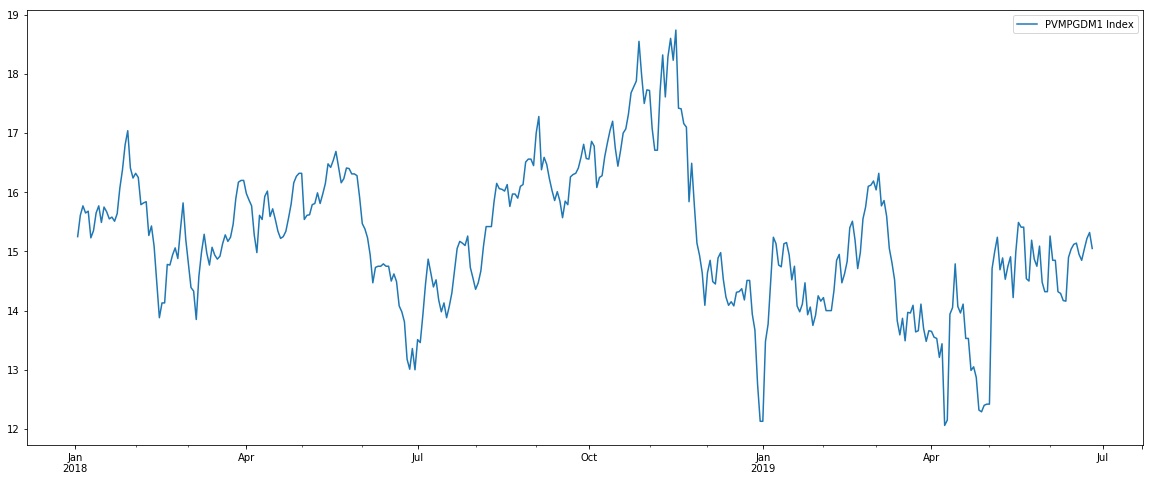

In [8]:
df1['PVMPGDM1 Index'].plot(figsize=(20,8),legend=True);

## ACF and PAFC plot

In [9]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

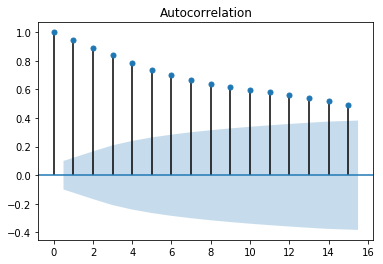

In [30]:
lag = 15
plot_acf(df1['PVMPGDM1 Index'],lags=lag);

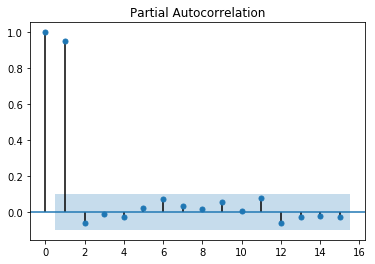

In [31]:
plot_pacf(df1['PVMPGDM1 Index'],lags=lag);

In [11]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [12]:
adf_test(df1['PVMPGDM1 Index'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.204340
p-value                   0.019735
# lags used               0.000000
# observations          385.000000
critical value (1%)      -3.447450
critical value (5%)      -2.869077
critical value (10%)     -2.570785
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

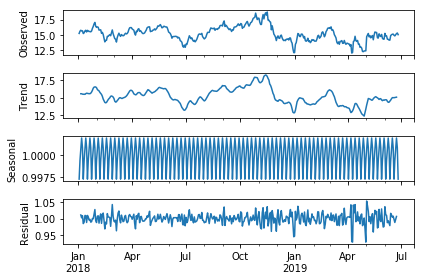

In [14]:
seasonal_decompose(df1['PVMPGDM1 Index'],model='mul').plot();

In [15]:
auto_arima(df1['PVMPGDM1 Index'],start_p=0,start_q=0,seasonal = False,trace=True).summary()

Fit ARIMA: order=(0, 1, 0); AIC=365.143, BIC=373.049, Fit time=0.012 seconds
Fit ARIMA: order=(1, 1, 0); AIC=366.753, BIC=378.613, Fit time=0.029 seconds
Fit ARIMA: order=(0, 1, 1); AIC=366.741, BIC=378.600, Fit time=0.020 seconds
Fit ARIMA: order=(1, 1, 1); AIC=368.654, BIC=384.467, Fit time=0.082 seconds
Total fit time: 0.161 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  385
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -180.571
Method:                           css   S.D. of innovations              0.387
Date:                Wed, 10 Jul 2019   AIC                            365.143
Time:                        08:34:45   BIC                            373.049
Sample:                             1   HQIC                           368.278
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.020     -0.026      0.979      -0.039       0.038
==============================================================================
"""

In [16]:
len(df1)

386

In [17]:
#10 Business Day
train = df1.iloc[:229]
test = df1.iloc[229:]

In [43]:
results = ARMA(train['PVMPGDM1 Index'],order=(1,1)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:         PVMPGDM1 Index   No. Observations:                  229
Model:                     ARMA(1, 1)   Log Likelihood                 -62.537
Method:                       css-mle   S.D. of innovations              0.316
Date:                Wed, 10 Jul 2019   AIC                            133.073
Time:                        10:28:59   BIC                            146.808
Sample:                    01-02-2018   HQIC                           138.614
                         - 11-16-2018                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   15.7896      0.402     39.288      0.000      15.002      16.577
ar.L1.PVMPGDM1 Index     0.9467      0.022     42.785      0.000       0.903       0.990
ma.L1.PVMPGDM1 Index     0.0981      0.076      1.290      0.198      -0.051       0.247
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0563           +0.0000j            1.0563            0.0000
MA.1          -10.1909           +0.0000j           10.1909            0.5000
-----------------------------------------------------------------------------
"""

In [44]:
start = len(train)
end = len(train) + len(test) - 1

predictions = results.predict(start=start,end=end).rename('ARMA(1,0) Predictions')

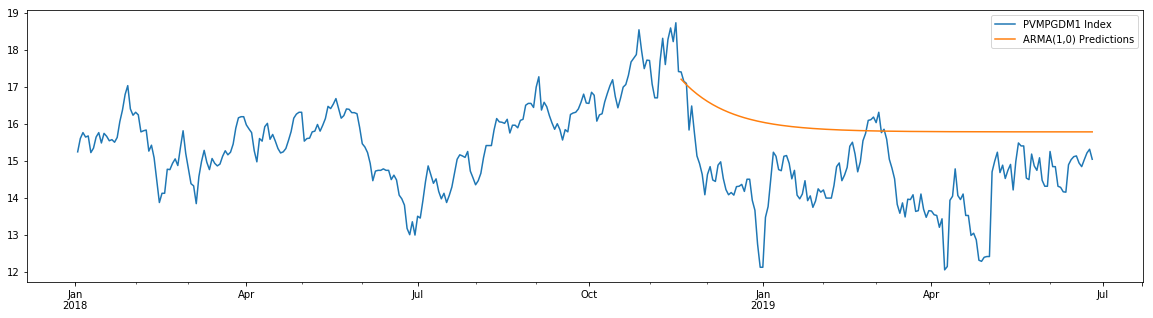

In [45]:
df1['PVMPGDM1 Index'].plot(figsize=(20,5),legend=True)
predictions.plot(legend=True)

In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

error = mean_absolute_error(test['PVMPGDM1 Index'], predictions)
print(f' MAE Error: {error:11.10}') 
error = mean_squared_error(test['PVMPGDM1 Index'], predictions)
print(f' MSE Error: {error:11.10}') 
error = math.sqrt(error)
print(f' RMSE Error: {error:11.10}') 

 MAE Error: 1.516514208
 MSE Error: 3.042323229
 RMSE Error: 1.744225682


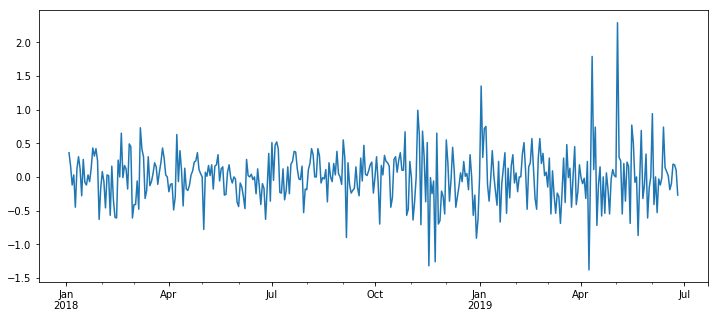

In [47]:
from statsmodels.tsa.statespace.tools import diff

df1['d1'] = diff(df1['PVMPGDM1 Index'],k_diff=1)
df1['d1'].plot(figsize=(12,5));

In [48]:
adf_test(df1['d1'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -18.941737
p-value                   0.000000
# lags used               0.000000
# observations          384.000000
critical value (1%)      -3.447495
critical value (5%)      -2.869096
critical value (10%)     -2.570795
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
